<a href="https://colab.research.google.com/github/SP23PHCS/Amazon/blob/main/Copy_of_Full_and_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Abdul Rehman SP23-PHCS-0002
# Zubair Sajid FA23-PHCS-0004


# Data Science for Amazon Dataset for 1400+ Products (Dataset on Kaggle) Pirce in INR

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statistics
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [40]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [42]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [43]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

# Data Cleaning

In [44]:
#1. Create a Copy of base data manupulation & processing
new_df = df.copy()

In [45]:
#2 Remove the '₹' symbol and commas, then convert to numeric
new_df['actual_price'] = new_df['actual_price'].str.replace('₹', '').str.replace(',', '')
new_df['discounted_price'] = new_df['discounted_price'].str.replace('₹', '').str.replace(',', '')
new_df['discount_percentage'] = new_df['discount_percentage'].str.replace('%', '')
new_df['rating_count'] = new_df['rating_count'].str.replace(',', '')

In [46]:
new_df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [47]:
#3 Converting to numeric Values
new_df.actual_price = pd.to_numeric(new_df.actual_price, errors = 'coerce')
new_df.discounted_price = pd.to_numeric(new_df.discounted_price, errors = 'coerce')
new_df.rating = pd.to_numeric(new_df.rating, errors = 'coerce')
new_df.rating_count = pd.to_numeric(new_df.rating_count, errors = 'coerce')

In [48]:
# Standardizing text fields
new_df['product_name'] = new_df['product_name'].str.lower()
new_df['category'] = new_df['category'].str.lower()

In [49]:
#4 Parsing Categories
new_df['primary_category'] = new_df['category'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else np.nan)

In [50]:
#5 Converting 'rating' column to numeric values
#Non-numeric values will be converted to NaN and then filled with 0
#new_df['rating'] = pd.to_numeric(new_df['rating'], errors='coerce').fillna(0)

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# Checking Null Values

In [53]:
#checking null values
new_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
primary_category       0
dtype: int64

# Missing Value Treatment


In [54]:
# Missing Value Treatment
#Since there were only 2 records compared to total dataset is very low, it is safe to ignore them for further processsing

#Removing Missing Values
new_df.dropna(how = 'any', inplace = True)
new_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
primary_category       0
dtype: int64

# Feature Engineering

# Feature Binning

In [55]:

# Assuming new_df is your dataframe and 'discount_percentage' is a column with percentage values as integers

# Convert discount_percentage to numeric type if it's not already
new_df['discount_percentage'] = pd.to_numeric(new_df['discount_percentage'], errors='coerce')

# Check the max value after conversion, just to confirm
print(new_df['discount_percentage'].max())

# Define labels for the bins
labels = ["{0} - {1}".format(i, i+14) for i in range(0, 100, 20)]

# Define bins, ensuring they cover the entire range of data
bins = [0, 20, 40, 60, 80, 100]  # Covering 0-99 inclusive

# Use pd.cut to bin the data
new_df['discount_percentage_bin'] = pd.cut(new_df['discount_percentage'], bins, right=False, labels=labels)

94


In [56]:
new_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,primary_category,discount_percentage_bin
0,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,computers&accessories,60 - 74
1,B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,computers&accessories,40 - 54
2,B096MSW6CT,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,computers&accessories,80 - 94
3,B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,computers&accessories,40 - 54
4,B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,computers&accessories,60 - 74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,noir aqua - 5pcs pp spun filter + 1 spanner | ...,home&kitchen|kitchen&homeappliances|waterpurif...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,home&kitchen,40 - 54
1461,B01M6453MB,prestige delight prwo electric rice cooker (1 ...,home&kitchen|kitchen&homeappliances|smallkitch...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z

# # New Metrics

In [57]:
# New Metrics
# Example: Price Reduction Percentage
new_df['price_reduction_percentage'] = ((new_df['actual_price'] - new_df['discounted_price']) / new_df['actual_price']) * 100


new_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,primary_category,discount_percentage_bin,price_reduction_percentage
0,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,computers&accessories,60 - 74,63.694268
1,B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,computers&accessories,40 - 54,42.979943
2,B096MSW6CT,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,computers&accessories,80 - 94,89.520800
3,B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,computers&accessories,40 - 54,52.932761
4,B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,computers&accessories,60 - 74,61.403509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,noir aqua - 5pcs pp spun filter + 1 spanner | ...,home&kitchen|kitchen&homeappliances|waterpurif...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,home&kitchen,40 - 54,58.759521
1461,B01M6453MB,prestige delight prwo electric rice cooker (1 ...,home&kitchen|kitchen&homeappliances|smallkitch...,2280.0,3

# Dropping the Columns (Feature Selection)

In [58]:
#drop columns customerID and tenure
new_df.drop(columns= ['user_id','user_name', 'img_link','product_link'], axis=1, inplace = True)

In [59]:
new_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,primary_category,discount_percentage_bin,price_reduction_percentage
0,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,computers&accessories,60 - 74,63.694268
1,B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,computers&accessories,40 - 54,42.979943
2,B096MSW6CT,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",computers&accessories,80 - 94,89.520800
3,B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",computers&accessories,40 - 54,52.932761
4,B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",computers&accessories,60 - 74,61.403509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,noir aqua - 5pcs pp spun filter + 1 spanner | ...,home&kitchen|kitchen&homeappliances|waterpurif...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",home&kitchen,40 - 54,58.759521
1461,B01M6453MB,prestige delight prwo electric rice cooker (1 ...,home&kitchen|kitchen&homeappliances|smallkitch...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",home&kitchen,20 - 34,25.123153
1462,B009P2LIL4,bajaj majesty rx10 2000 watts heat convector r...,"home&kitchen|heating,cooling&airquality|roomhe...",2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",home&kitchen,20 - 34,27.954545
1463,B00J5DYCCA,havells ventil air dsp 230mm exhaust fan (pist...,"home&kitchen|heating,cooling&airquality|fans|e...",1399.0,1890.0,26,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,home&kitchen,20 - 34,25.978836


# UNIVARIATE ANALYSIS

In [60]:
# Handling Textual Reviews

# Example: Review length
new_df['review_length'] = new_df['review_content'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)

# Data Transformation Min Max Scalar

In [61]:
## Data Transformation

# The 'rating' column is of object type and contains string representations of numbers.
# We need to convert these strings to numeric values before normalization.

# Converting 'rating' column to numeric values
# Non-numeric values will be converted to NaN and then filled with 0
new_df['rating'] = pd.to_numeric(new_df['rating'], errors='coerce').fillna(0)

# Re-applying MinMaxScaler to the 'rating' column
scaler = MinMaxScaler()
new_df['rating_normalized'] = scaler.fit_transform(new_df[['rating']])

# Displaying the first few rows to verify the changes
new_df[['rating', 'rating_normalized']].head()

,rating,rating_normalized
0,4.2,0.733333
1,4.0,0.666667
2,3.9,0.633333
3,4.2,0.733333
4,4.2,0.733333


In [62]:
# Data Integrity

# Duplication Checks
duplicate_count = new_df.duplicated().sum()

# Anomaly Detection (example: checking for unusual prices)
unusual_prices = new_df[(new_df['discounted_price'] > new_df['actual_price']) | (new_df['discounted_price'] < 0)]


In [63]:
new_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,primary_category,discount_percentage_bin,price_reduction_percentage,review_length,rating_normalized
0,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,computers&accessories,60 - 74,63.694268,60,0.733333
1,B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,computers&accessories,40 - 54,42.979943,201,0.666667
2,B096MSW6CT,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",computers&accessories,80 - 94,89.520800,13,0.633333
3,B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",computers&accessories,40 - 54,52.932761,77,0.733333
4,B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",computers&accessories,60 - 74,61.403509,415,0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,noir aqua - 5pcs pp spun filter + 1 spanner | ...,home&kitchen|kitchen&homeappliances|waterpurif...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",home&kitchen,40 - 54,58.759521,77,0.666667
1461,B01M6453MB,prestige delight prwo electric rice cooker (1 ...,home&kitchen|kitchen&homeappliances|smallkitch...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",home&kitchen,20 - 34,25.123153,179,0.700000
1462,B009P2LIL4,bajaj majesty rx10 2000 watts heat convector r...,"home&kitchen|heating,cooling&airquality|roomhe...",2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",home&kitchen,20 - 34,27.954545,151,0.533333
1463,B00J5DYCCA,havells ventil air dsp 230mm exhaust fan (pist...,"home&kitchen|heating,cooling&airquality|fans|e...",1399.0,1890.0,26,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,home&kitchen,20 - 34,25.978836,51,0.666667


# Extracting Customer Sentiment from Reviews
Applying sentiment analysis to review content using VADER.

In [88]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
new_df['sentiment_score'] = new_df['review_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Aggregating sentiment score for each product
product_sentiment = new_df.groupby('product_id')['sentiment_score'].mean()

new_df[['product_name','sentiment_score']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,product_name,sentiment_score
0,wayona nylon braided usb to lightning fast cha...,0.9033
1,ambrane unbreakable 60w / 3a fast charging 1.5...,0.9853
2,sounce fast phone charging cable & data sync u...,0.6808
3,boat deuce usb 300 2 in 1 type-c & micro usb s...,0.8316
4,portronics konnect l 1.2m fast charging 3a 8 p...,0.9809
...,...,...
1460,noir aqua - 5pcs pp spun filter + 1 spanner | ...,0.9468
1461,prestige delight prwo electric rice cooker (1 ...,0.7876
1462,bajaj majesty rx10 2000 watts heat convector r...,0.9698
1463,havells ventil air dsp 230mm exhaust fan (pist...,-0.2960


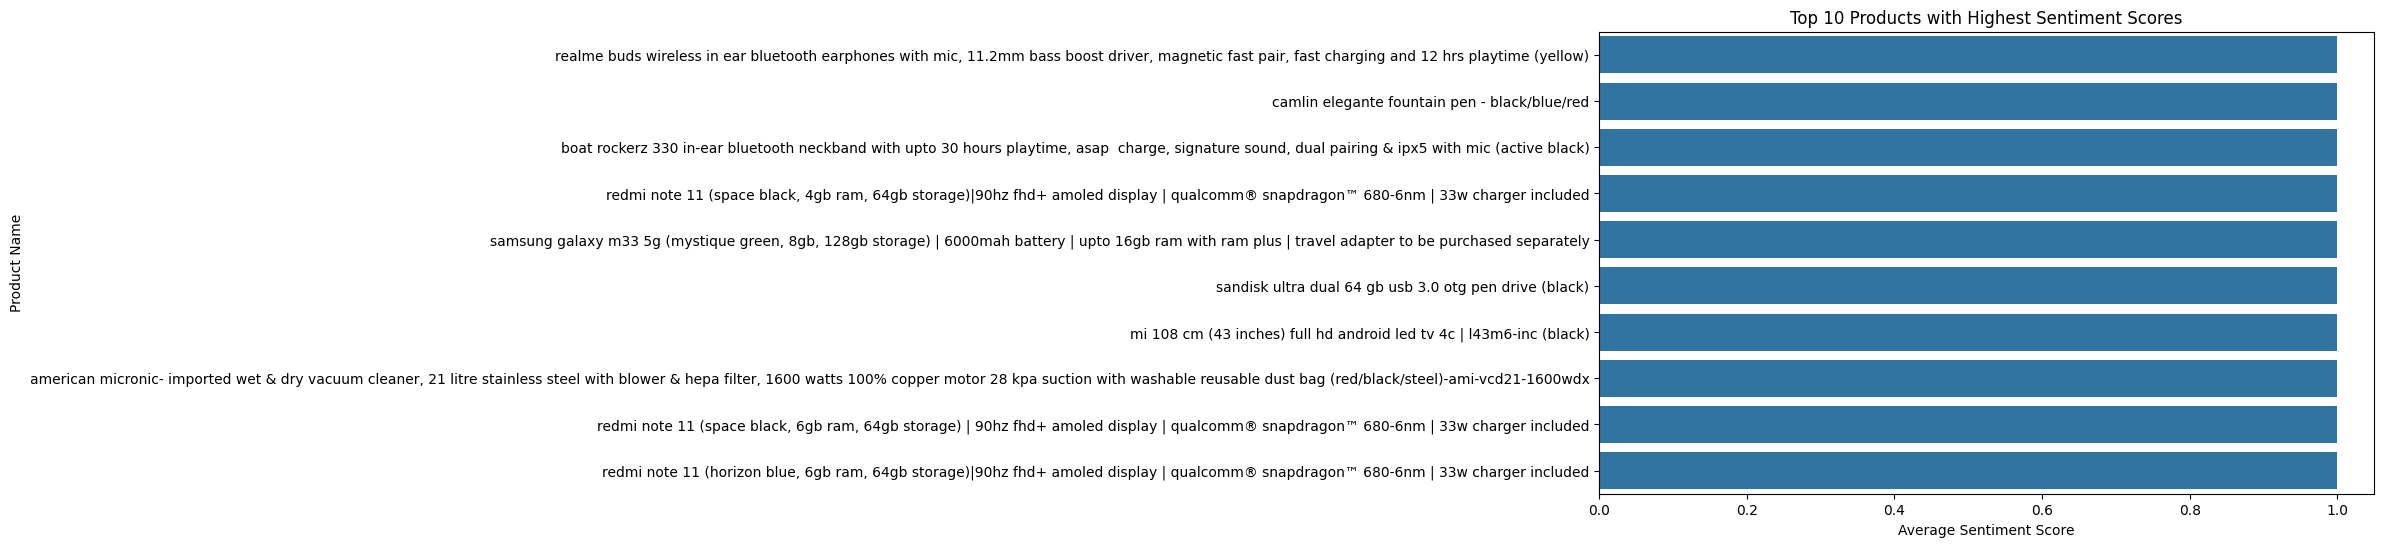

In [89]:
# Aggregating sentiment score for each product by product_name
product_sentiment = new_df.groupby('product_name')['sentiment_score'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sentiment.values, y=product_sentiment.index)
plt.title("Top 10 Products with Highest Sentiment Scores")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Product Name")
plt.show()

# Predicting Product Popularity
Using a regression model to predict product ratings based on features like price, review count, and category.


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming amazon_data is your DataFrame
features = ['sentiment_score', 'price_reduction_percentage', 'rating_count']  # Example features
target = 'rating'  # Target variable

# Preparing the data
X = new_df[features]
y = new_df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.06500035836177477


In [91]:
# Example new data for prediction
new_data = pd.DataFrame({
    'sentiment_score': [0],  # Example values
    'price_reduction_percentage': [0],  # Example values
    'rating_count': [0]  # Example values
})

# Making predictions
predicted_ratings = model.predict(new_data)

# Outputting the predicted ratings
print(predicted_ratings)

[2.641]


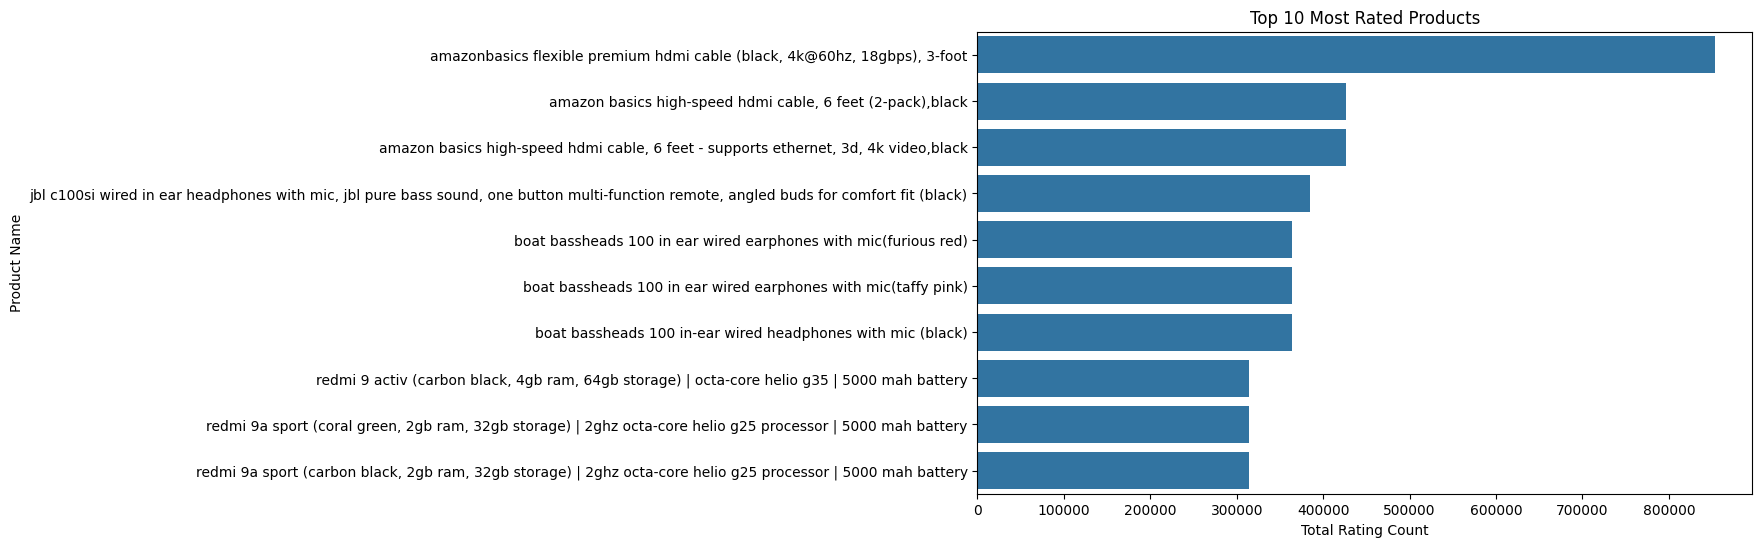

In [92]:
# Top 10 Most Rated Products
most_rated_products = new_df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=most_rated_products.values, y=most_rated_products.index)
plt.title("Top 10 Most Rated Products")
plt.xlabel("Total Rating Count")
plt.ylabel("Product Name")
plt.show()


                            discounted_price  actual_price  \
discounted_price                    1.000000      0.961910   
actual_price                        0.961910      1.000000   
price_reduction_percentage         -0.241892     -0.117461   
rating                              0.121132      0.122467   

                            price_reduction_percentage    rating  
discounted_price                             -0.241892  0.121132  
actual_price                                 -0.117461  0.122467  
price_reduction_percentage                    1.000000 -0.155742  
rating                                       -0.155742  1.000000  


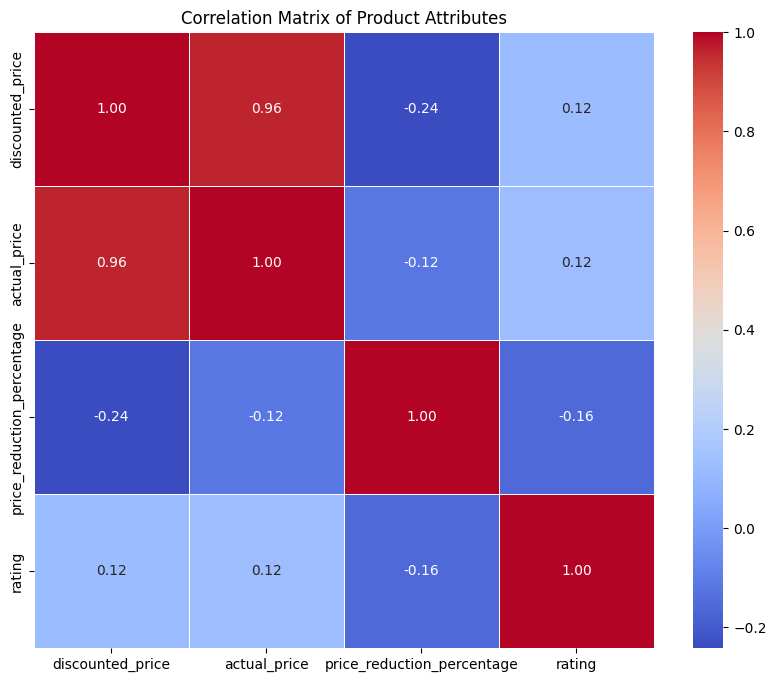

In [93]:
# Correlation analysis
correlation_matrix = new_df[['discounted_price', 'actual_price', 'price_reduction_percentage', 'rating']].corr()
print(correlation_matrix)


# Assuming 'new_df' is your DataFrame and it contains the specified columns

# Correlation analysis
correlation_matrix = new_df[['discounted_price', 'actual_price', 'price_reduction_percentage', 'rating']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Product Attributes")
plt.show()


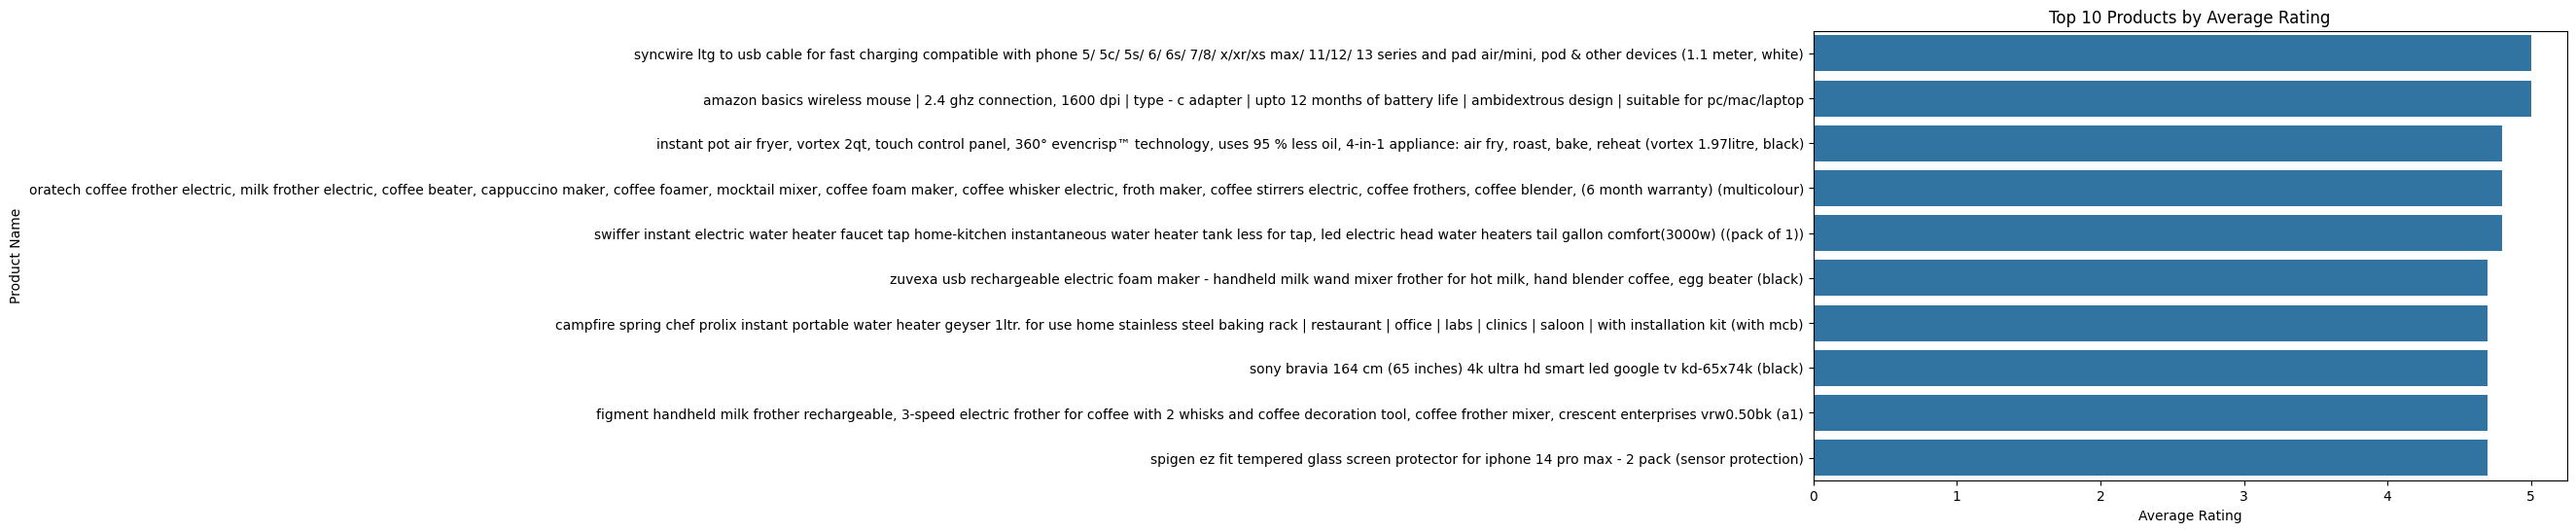

In [94]:
# Average Rating of Products
average_ratings = new_df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.values, y=average_ratings.index)
plt.title("Top 10 Products by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.show()


In [95]:
# Assuming sentiment polarity is already calculated in the dataset
# Products with the Most Positive Reviews
print("\nProducts with the Most Positive Reviews:")
positive_reviews = new_df.groupby('product_name')['sentiment_score'].mean().sort_values(ascending=False).head(10)

print(positive_reviews)

# Products with the Most Negative Reviews
print("\nProducts with the Most Negative Reviews:")
negative_reviews = new_df.groupby('product_name')['sentiment_score'].mean().sort_values().head(10)

print(negative_reviews)


Products with the Most Positive Reviews:
product_name
realme buds wireless in ear bluetooth earphones with mic, 11.2mm bass boost driver, magnetic fast pair, fast charging and 12 hrs playtime (yellow)                                                                           0.9999
camlin elegante fountain pen - black/blue/red                                                                                                                                                                                0.9998
boat rockerz 330 in-ear bluetooth neckband with upto 30 hours playtime, asap  charge, signature sound, dual pairing & ipx5 with mic (active black)                                                                           0.9998
redmi note 11 (space black, 4gb ram, 64gb storage)|90hz fhd+ amoled display | qualcomm® snapdragon™ 680-6nm | 33w charger included                                                                                           0.9998
samsung galaxy m33 5g (mystique g

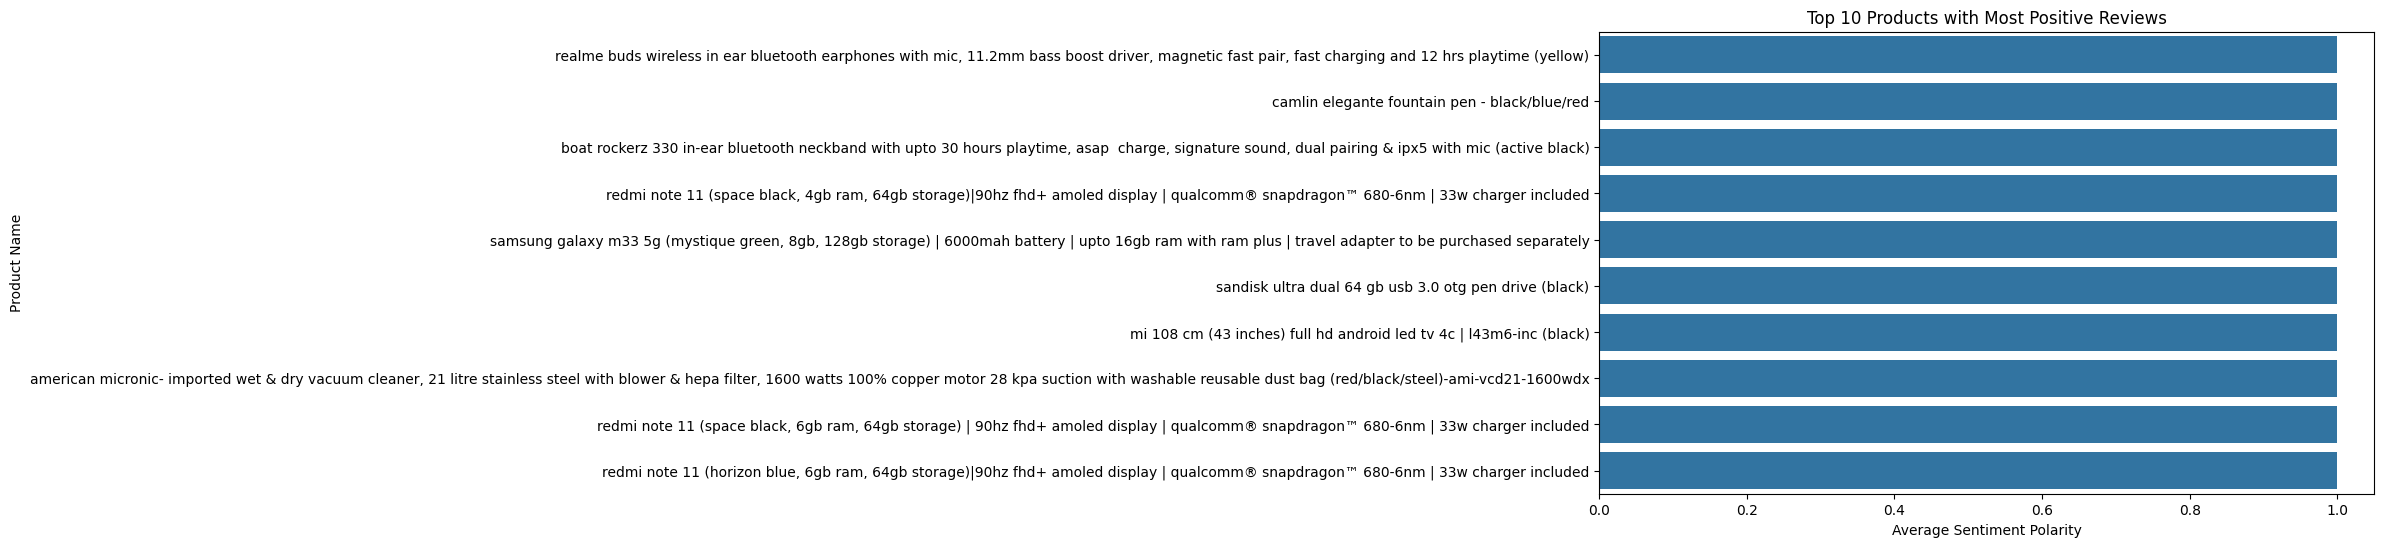

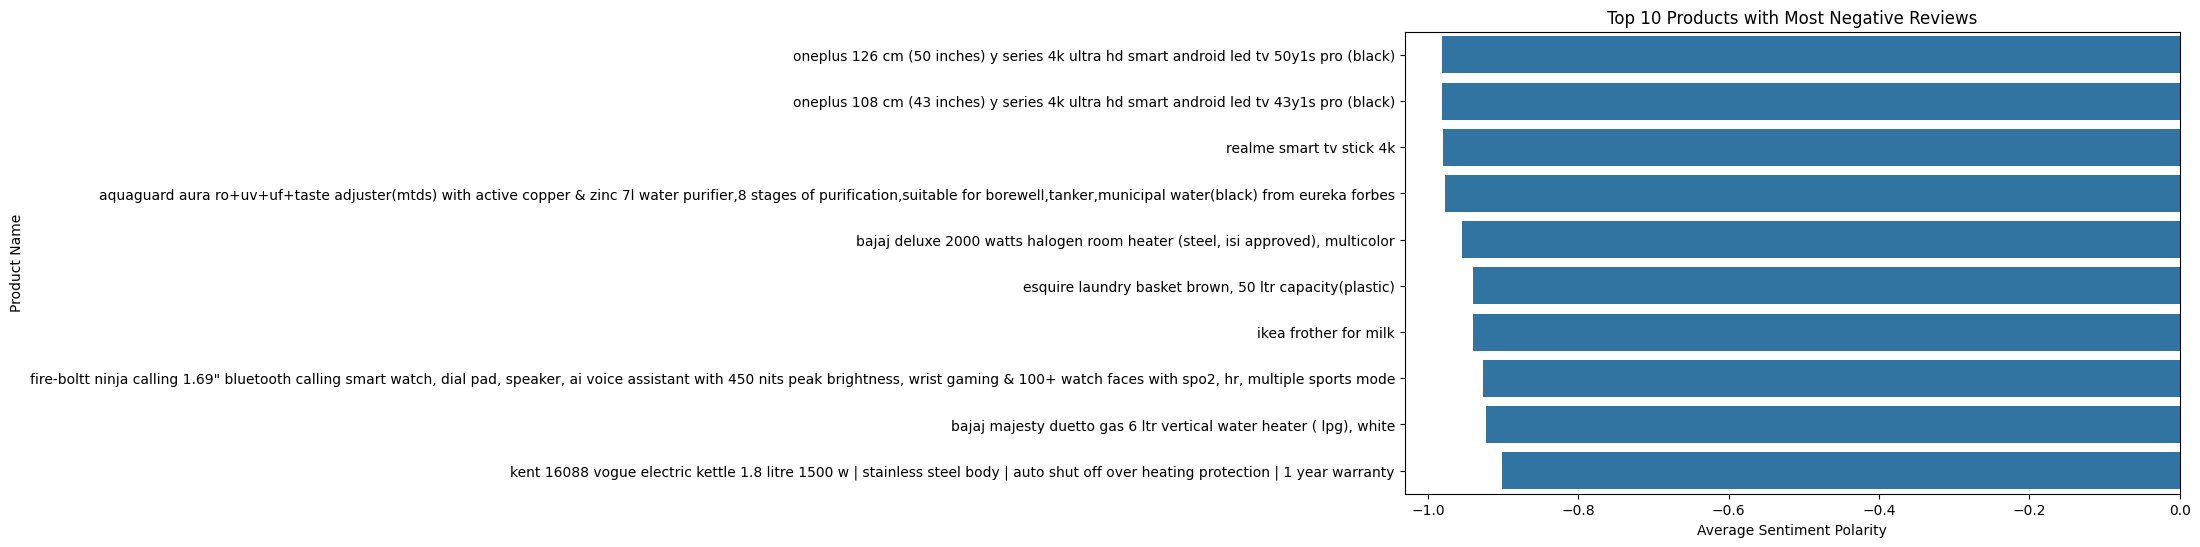

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sentiment polarity is already calculated in the dataset

# Products with the Most Positive Reviews
positive_reviews = new_df.groupby('product_name')['sentiment_score'].mean().sort_values(ascending=False).head(10)

# Products with the Most Negative Reviews
negative_reviews = new_df.groupby('product_name')['sentiment_score'].mean().sort_values().head(10)

# Plotting Positive Reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_reviews.values, y=positive_reviews.index)
plt.title("Top 10 Products with Most Positive Reviews")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Product Name")
plt.show()

# Plotting Negative Reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reviews.values, y=negative_reviews.index)
plt.title("Top 10 Products with Most Negative Reviews")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Product Name")
plt.show()


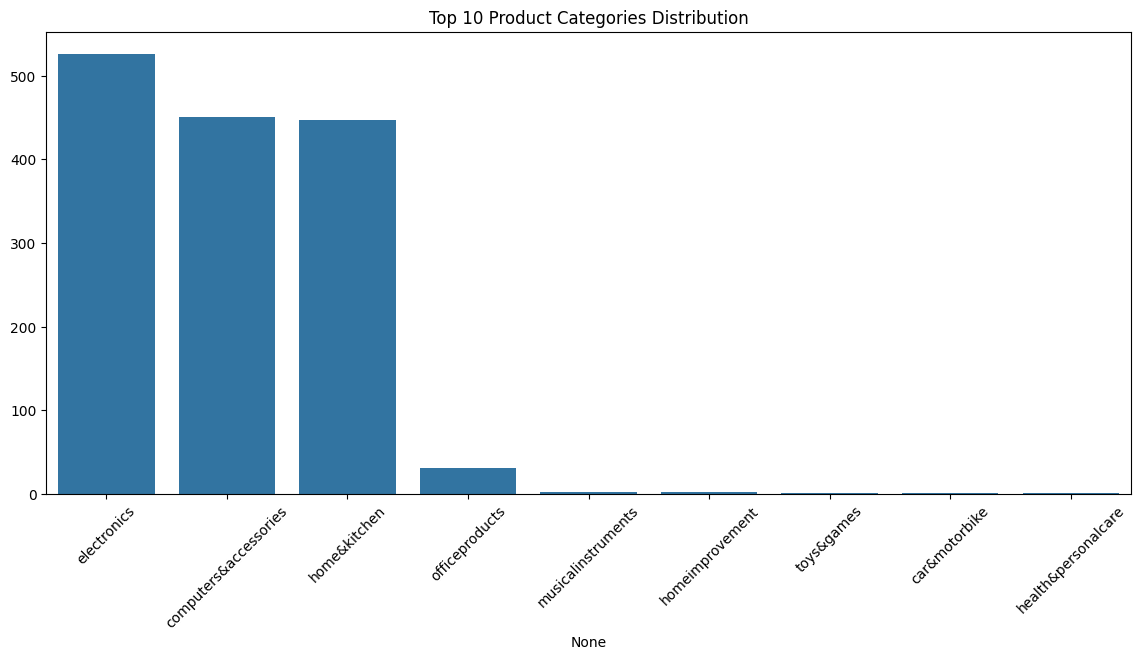

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_df['category'] contains the category data
# If 'category' column contains lists or arrays, use 'explode' method to flatten it
category_counts = new_df['primary_category'].explode().value_counts()

# Select the top 20 categories
top_10_categories = category_counts.head(10)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories Distribution")
plt.show()
